In [1]:
# import required libraries

import numpy as np
from math import sin
from math import pi
from math import exp
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

## Sine Wave

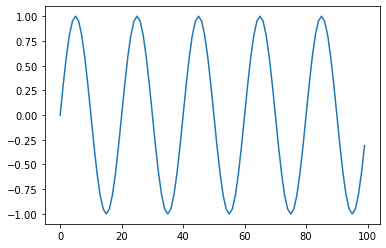

In [2]:
# create the sequence
length = 100
frequency = 5

sequence = [sin(2 * pi * frequency * (i/length)) for i in range(length)]

# plot the sequence
plt.plot(sequence)
plt.show()

## Damped Sine Wave

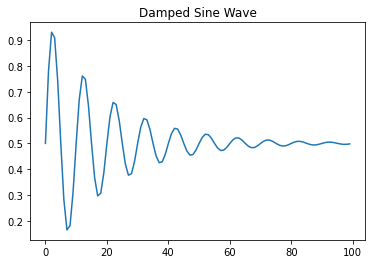

In [3]:
# create the sequence

length = 100
period = 10
decay = 0.05

sequence = [0.5 + 0.5 * sin(2 * pi * i/period) * exp(-decay * i) for i in range(length)]

# plot the sequence
plt.plot(sequence)
plt.title('Damped Sine Wave')
plt.show()

### I will use Damped Sine Wave as a sequence prediction problem to demonstrate Stacked LSTMs.

In [4]:
# generate random damped sine wave in [0, 1]

def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i/period) * exp(-decay * i) for i in range(length)]


In [5]:
# generate input and output pairs of damped sine waves

def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        period = np.random.randint(10, 20)
        decay = np.random.uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, period, decay)
#         print("sequence :", sequence)
#         print("sequence[:-output] :", sequence[:-output])
#         print("sequence[-output:] :", sequence[-output:])
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    
    X = np.array(X).reshape(n_patterns, length, 1)
    y = np.array(y).reshape(n_patterns, output)
    return X, y

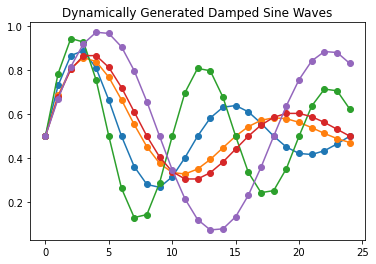

In [6]:
# test problem generation
X, y = generate_examples(20, 5, 5)
for i in range(len(X)):
    plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o')
    
plt.title('Dynamically Generated Damped Sine Waves')
plt.show()

In [7]:
## Configure the problem

length = 50
output = 5

In [8]:
# define the model

model = Sequential()
model.add(LSTM(units=20, return_sequences=True, input_shape=(length, 1)))
model.add(LSTM(units=20))
model.add(Dense(output))
model.compile(loss='mae', optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# fit the model


import time
start_time = time.time()

X, y = generate_examples(length, 100000, output)
history = model.fit(X, y, batch_size=10, epochs=1, verbose=1)

print('Time Taken :', time.time() - start_time)

10000/10000 [==============================] - 144s 14ms/step - loss: 0.0093
Time Taken : 150.16162633895874


In [10]:
# evaluate the model

X, y = generate_examples(length, 1000, output)
loss = model.evaluate(X, y, verbose=1)

print("MAE :", loss)

32/32 [==============================] - 1s 8ms/step - loss: 0.0218
MAE : 0.021769210696220398


1/1 [==============================] - 0s 25ms/step


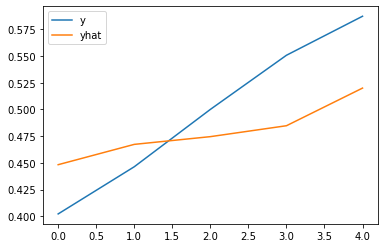

In [26]:
# prediction on new data

X, y = generate_examples(length, 1, output)
yhat = model.predict(X, verbose=1)

# plot the result
plt.plot(y[0], label='y')
plt.plot(yhat[0], label='yhat')
plt.legend()
plt.show()